# Task
1. Implement the simple genetic algorithm in a programming language of your choice.
2. Use the implemented genetic algorithm to find an individual with all 1s. (So called OneMAX problem.)
3. Change the fitness of the algorithm to find an individual with alternating 1s and 0s (either 010101... or 101010...).
4. Try to change the parameters (probability of mutation/crossover) and see what happens.
5. Submit a plot comparing the convergence of the algorithm for two different settings of the algorithm.
6. Explain what you did.


In [24]:
import random


class SimpleGeneticAlgorithm:
    def __init__(self, parameters = None):
        if parameters is None:
            self.parameters = dict(
                max_num_generations = 100,
                population_size = 50,
                len_of_individual = 25,
                mutation_prob = 0.2,
                crossover_prob = 0.8,
                mutation_flip_prob = 1/25,
            )
        else:
            self.parameters = parameters

    def fitness(self, x):
        return sum(x)

    def select(self, pop, fits):
        return random.choices(pop, fits, k=self.parameters["population_size"])

    def cross(self, p1, p2):
        p = random.randrange(1, self.parameters["len_of_individual"])
        return p1[:p] + p2[p:], p2[:p] + p1[p:]

    def crossover(self, pop):
        o = []
        for p1, p2 in zip(pop[::2], pop[1::2]):
            o1, o2 = p1, p2
            if random.random() < self.parameters["crossover_prob"]:
                o1, o2 = self.cross(p1, p2)
            o.append(o1[:])
            o.append(o2[:])
        return o

    def mutate(self, ind):
        return [1 - v if random.random() < self.parameters["mutation_flip_prob"] else v for v in ind]

    def mutation(self, pop):
        return [self.mutate(ind) if random.random() < self.parameters["mutation_prob"] else ind[:] for ind in pop]

    def random_individual(self):
        return [0 if random.random() < 0.5 else 1 for _ in range(self.parameters["len_of_individual"])]

    def random_initial_population(self):
        return [self.random_individual() for _ in range(self.parameters["population_size"])]

    def evolutionary_algorithm(self, pop):
        log = []
        for _ in range(self.parameters["max_num_generations"]):
            fits = [self.fitness(ind) for ind in pop]
            log.append({"max_fitness": max(fits),
                        "best_individuals": [ind for ind, fit in zip(pop, fits) if fit == max(fits)]}) 
            mating_pool = self.select(pop, fits)
            o = self.crossover(mating_pool)
            offspring = self.mutation(o)
            pop = offspring[:]
        return pop, log

In [35]:
logs = []
NUM_RUNS = 10
parameters = dict(
    max_num_generations = 100,
    population_size = 200,
    len_of_individual = 25,
    mutation_prob = 0.2,
    crossover_prob = 0.8,
    mutation_flip_prob = 1/25,
)
alg = SimpleGeneticAlgorithm(parameters)
for _ in range(NUM_RUNS):
    pop = alg.random_initial_population()
    pop, log = alg.evolutionary_algorithm(pop)
    logs.append(log)
best_individuals_last_gen = [log_run[-1]["best_individuals"][0] for log_run in logs]
print([sum(individual) for individual in best_individuals_last_gen])

[24, 25, 25, 24, 25, 25, 24, 25, 25, 25]


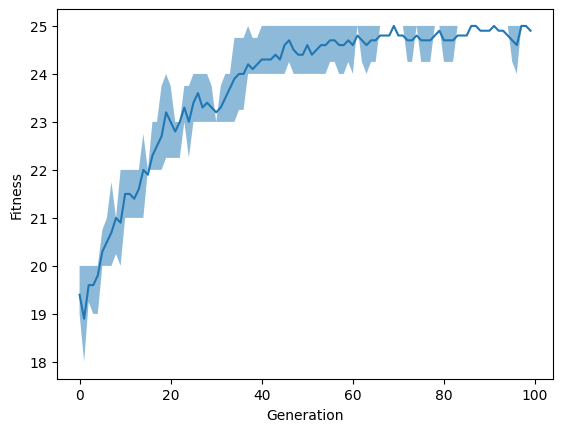

In [31]:
import matplotlib.pyplot as plt
import numpy as np


logs = np.array([[log_gen["max_fitness"] for log_gen in log_run] for log_run in logs])

plt.plot(logs.mean(axis=0))
plt.fill_between(list(range(alg.parameters["max_num_generations"])), np.percentile(logs, axis=0, q=25), 
                                       np.percentile(logs, axis=0, q=75), alpha=0.5)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

In [42]:
class SimpleGeneticAlgorithmAlternating(SimpleGeneticAlgorithm):
    def fitness(self, x):
        return max(sum(x[1::2]) - sum(x[::2]), sum(x[::2]) - sum(x[1::2]))

logs = []
NUM_RUNS = 10
parameters = dict(
    max_num_generations = 100,
    population_size = 50,
    len_of_individual = 25,
    mutation_prob = 0.2,
    crossover_prob = 0.8,
    mutation_flip_prob = 1/25,
)
alg = SimpleGeneticAlgorithmAlternating(parameters)
for _ in range(NUM_RUNS):
    pop = alg.random_initial_population()
    pop, log = alg.evolutionary_algorithm(pop)
    logs.append(log)
best_individuals_last_gen = [log_run[-1]["best_individuals"][0] for log_run in logs]
print([(sum(individual[1::2]), sum(individual[::2])) for individual in best_individuals_last_gen])

[(0, 13), (1, 13), (0, 13), (0, 13), (1, 13), (0, 13), (0, 13), (0, 13), (0, 13), (0, 13)]


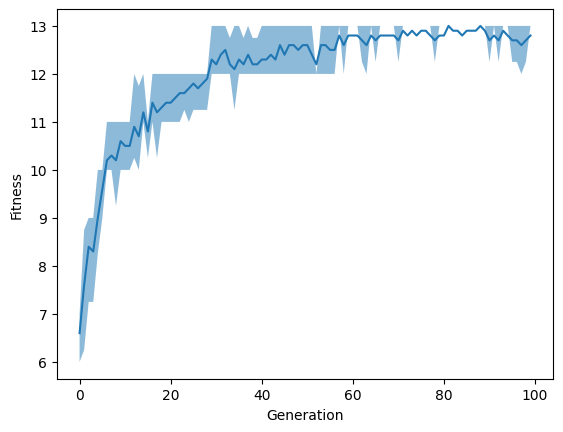

In [43]:
import matplotlib.pyplot as plt
import numpy as np

logs = np.array([[log_gen["max_fitness"] for log_gen in log_run] for log_run in logs])

plt.plot(logs.mean(axis=0))
plt.fill_between(list(range(alg.parameters["max_num_generations"])), np.percentile(logs, axis=0, q=25), 
                                       np.percentile(logs, axis=0, q=75), alpha=0.5)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

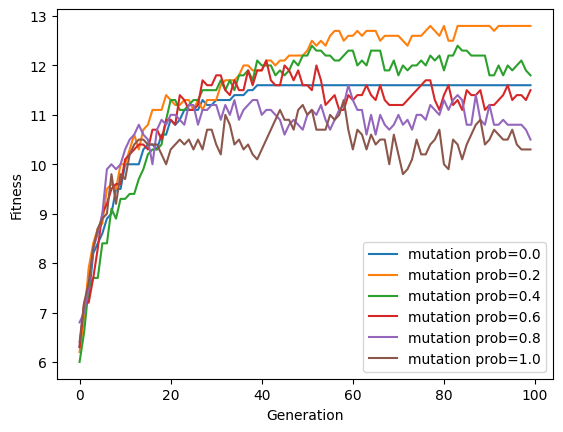

In [47]:
class SimpleGeneticAlgorithmAlternating(SimpleGeneticAlgorithm):
    def fitness(self, x):
        return max(sum(x[1::2]) - sum(x[::2]), sum(x[::2]) - sum(x[1::2]))

all_logs = []
mut_probs = [0., 0.2, 0.4, 0.6, 0.8, 1.]
NUM_RUNS = 10
for mut_prob in mut_probs:
    parameters = dict(
        max_num_generations = 100,
        population_size = 50,
        len_of_individual = 25,
        mutation_prob = mut_prob,
        crossover_prob = 0.8,
        mutation_flip_prob = 1/25,
    )
    logs = []
    alg = SimpleGeneticAlgorithmAlternating(parameters)
    for _ in range(NUM_RUNS):
        pop = alg.random_initial_population()
        pop, log = alg.evolutionary_algorithm(pop)
        logs.append(log)
    all_logs.append(logs)

import matplotlib.pyplot as plt
import numpy as np
for logs, mut_prob in zip(all_logs, mut_probs):
    logs = np.array([[log_gen["max_fitness"] for log_gen in log_run] for log_run in logs])

    plt.plot(logs.mean(axis=0), label=f"mutation prob={mut_prob}")
    # plt.fill_between(list(range(alg.parameters["max_num_generations"])), np.percentile(logs, axis=0, q=25), 
    #                                     np.percentile(logs, axis=0, q=75), alpha=0.5)
plt.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()